In [1]:
!date

Wed Aug 21 11:53:37 PDT 2024


In [2]:
!echo $CONDA_PREFIX

/c4/home/derek/miniconda3/envs/scquint_4


In [3]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
import seaborn.objects as so

In [8]:
# input_dir='/c4/home/derek/data1/derek/data_scSLR/PBMC/STAR_outs/sample_2/UMItools_dedup_outs/internal/'

#input_dir='/c4/home/derek/data1/derek/data_scSLR/PBMC/coverage_plots/bigwig_input/'

input_dir= '/c4/home/derek/data1/derek/data_scSLR/devBrain_fastqs/GW17_1/merged/genometracks/'

In [9]:
#df_5prime = pd.read_csv(input_dir+'5prime_dedup.geneBodyCoverage.txt',sep='\t')

#df_5prime = pd.read_csv(input_dir+'3prime_coverage.geneBodyCoverage.txt',sep='\t')

df_5prime = pd.read_csv(input_dir+'5prime_CB_UMI_dedup_genebody.geneBodyCoverage.txt',sep='\t')

In [10]:
df_5prime

,percentile,count
0,0,1721704
1,1,2272123
2,2,2567964
3,3,2723846
4,4,2776992
...,...,...
95,95,201036
96,96,169581
97,97,127215
98,98,93509


In [13]:
#normalize coverage
# df = df_5prime.drop('percentile', axis=1)
# cov_5prime = (df-df.min())/(df.max()-df.min())

# cov_5prime['percentile'] = df_5prime['percentile']

cov_5prime = df_5prime.copy()

cov_5prime = cov_5prime.rename(columns={'count':'5prime'})

In [20]:
df_3prime = pd.read_csv(input_dir+'3prime_CB_UMI_dedup_genebody.geneBodyCoverage.txt',sep='\t')


In [21]:
df_3prime.head()

,percentile,count
0,0,30258
1,1,45012
2,2,57639
3,3,67376
4,4,84247


In [22]:

cov_3prime= df_3prime.copy()


cov_3prime = cov_3prime.rename(columns={'count':'3prime'})

In [23]:
df_internal = pd.read_csv(input_dir+'internal_CB_UMI_dedup_genebody.geneBodyCoverage.txt',sep='\t')
    

In [25]:
#normalize coverage
# df = df_internal.drop('percentile', axis=1)
# cov_internal = (df-df.min())/(df.max()-df.min())

# cov_internal['percentile'] = df_internal['percentile']

cov_internal = df_internal.copy()


cov_internal = cov_internal.rename(columns={'count':'internal'})

In [26]:
cov_internal.head()

,percentile,internal
0,0,30258
1,1,45012
2,2,57639
3,3,67376
4,4,84247


In [30]:
cov = pd.merge(cov_5prime, cov_internal,
                on='percentile'
               )

cov = pd.merge(cov, cov_3prime,
                on='percentile'
               )


In [31]:
cov

,percentile,5prime,internal,3prime
0,0,1721704,30258,30258
1,1,2272123,45012,45012
2,2,2567964,57639,57639
3,3,2723846,67376,67376
4,4,2776992,84247,84247
...,...,...,...,...
95,95,201036,984112,984112
96,96,169581,1072378,1072378
97,97,127215,1142471,1142471
98,98,93509,1105713,1105713


In [42]:
cov = cov.melt(id_vars=['percentile'],
        var_name='Library', value_name='Coverage')

In [43]:
cov

,percentile,Library,Coverage
0,0,5prime,1721704
1,1,5prime,2272123
2,2,5prime,2567964
3,3,5prime,2723846
4,4,5prime,2776992
...,...,...,...
295,95,3prime,984112
296,96,3prime,1072378
297,97,3prime,1142471
298,98,3prime,1105713


In [44]:
color_mode = {'internal':(0.00784313725490196, 0.24313725490196078, 1.0),
 '5prime':(0.9098039215686274, 0.0, 0.043137254901960784),
              '3prime':(0.5, 0.1, 0.1)
}

#color_5prime = (0.9098039215686274, 0.0, 0.043137254901960784)

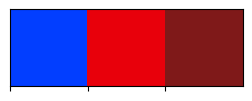

In [45]:
sns.palplot(color_mode.values())

In [46]:
cov['color'] = cov['Library'].map(color_mode)

In [47]:
p = so.Plot(cov, "percentile", "Coverage", color="Library",
           )

In [51]:
cov

,percentile,Library,Coverage,color
0,0,5prime,1721704,"(0.9098039215686274, 0.0, 0.043137254901960784)"
1,1,5prime,2272123,"(0.9098039215686274, 0.0, 0.043137254901960784)"
2,2,5prime,2567964,"(0.9098039215686274, 0.0, 0.043137254901960784)"
3,3,5prime,2723846,"(0.9098039215686274, 0.0, 0.043137254901960784)"
4,4,5prime,2776992,"(0.9098039215686274, 0.0, 0.043137254901960784)"
...,...,...,...,...
295,95,3prime,984112,"(0.5, 0.1, 0.1)"
296,96,3prime,1072378,"(0.5, 0.1, 0.1)"
297,97,3prime,1142471,"(0.5, 0.1, 0.1)"
298,98,3prime,1105713,"(0.5, 0.1, 0.1)"


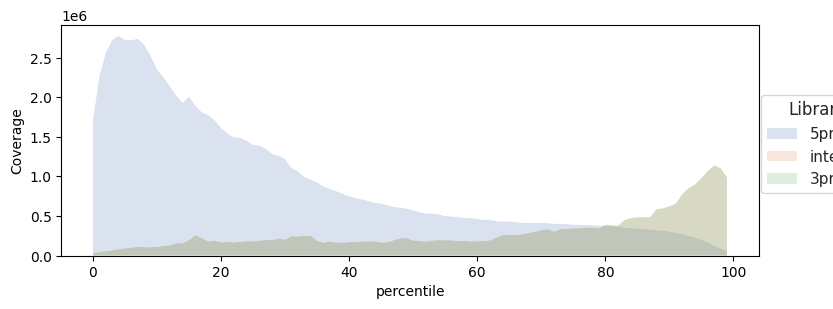

In [60]:
from seaborn import axes_style

fig, ax = plt.subplots(1,1,figsize=(9,3))

p.add(so.Line(linewidth=0,
             ), legend=False).add(
    so.Area(alpha=.2,edgewidth=0
           )).theme(
        axes_style({**axes_style("whitegrid"), 'axes.grid': False,})).on(ax).show()


#.save('./plots/Coverage.pdf')




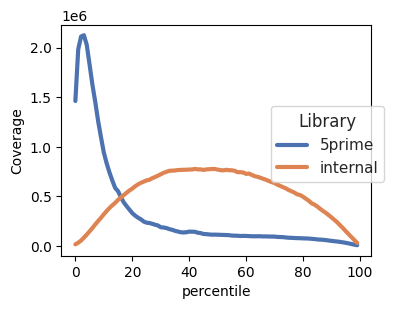

In [57]:
from seaborn import axes_style

fig, ax = plt.subplots(figsize=(4,3))



p.add(so.Line(linewidth=3,
             )).theme(
    axes_style({**axes_style("whitegrid"), 'axes.grid': False,})).on(ax).show()








# ).save('./plots/Coverage.pdf')